In [2]:
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from matplotlib import pyplot as plt

/usr/local/python/3.10.13/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'projection'
  result = super().contourf(*args, **kwargs)
/usr/local/python/3.10.13/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


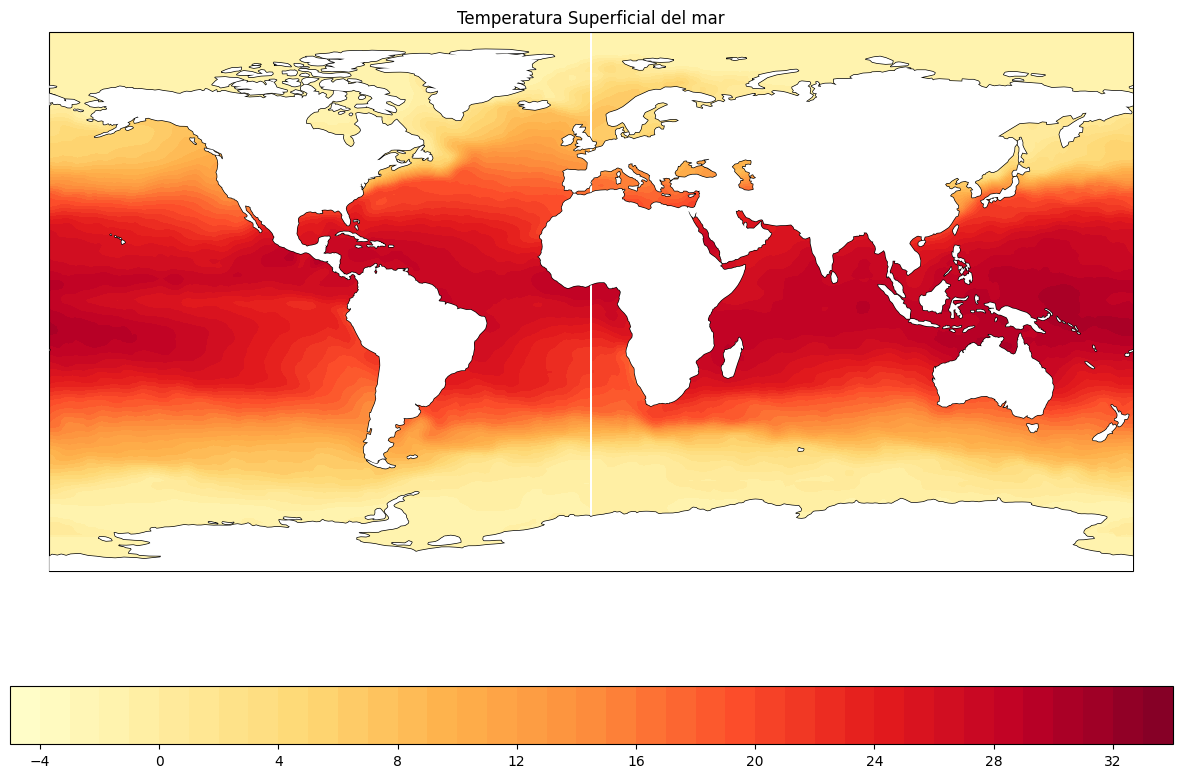

In [12]:
projStr = ccrs.PlateCarree()
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', color='black')
dataplot = ax.contourf(sst.sst[0].lon,sst.sst[0].lat,
                       sst.sst[0],
                       levels=list(np.arange(-5,35,1)),
                       projection=ccrs.PlateCarree(),cmap=plt.cm.YlOrRd)
ax.add_feature(cfeature.LAND, zorder=100, facecolor='white')
plt.colorbar(dataplot, orientation='horizontal')
#ax.set_extent([lonW, lonE, latS, latN], crs=ccrs.PlateCarree())
plt.title('Temperatura Superficial del mar')
plt.show()

In [1]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'format': 'netcdf',
        'product_type': 'monthly_averaged_reanalysis_by_hour_of_day',
        'variable': [
            'sea_surface_temperature', 'total_cloud_cover',
        ],
        'year': [
            '1983', '1984', '1985',
            '1986', '1987', '1988',
            '1989', '1990', '1991',
            '1992', '1993', '1994',
            '1995', '1996', '1997',
            '1998', '1999', '2000',
            '2001', '2002', '2003',
            '2004', '2005', '2006',
            '2007', '2008', '2009',
            '2010', '2011', '2012',
            '2013', '2014', '2015',
            '2016', '2017', '2018',
            '2019', '2020', '2021',
            '2022', '2023',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '16:00',
        'area': [
            90,-180,-90,180
        ],
    },
    'download.nc')

2024-08-18 19:04:23,850 INFO Welcome to the CDS.
 As per our announcements on the Forum, this instance of CDS will soon be decommissioned.
 Please update your cdsapi package to a version >=0.7.0, create an account on CDS-Beta and update your .cdsapirc file. We strongly recommend users to check our Guidelines at https://confluence.ecmwf.int/x/uINmFw
 The current legacy system will be kept for a while, but we will reduce resources gradually until full decommissioning in September 2024.
2024-08-18 19:04:23,851 WARNING MOVE TO CDS-Beta
2024-08-18 19:04:23,852 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2024-08-18 19:04:23,998 INFO Request is queued
2024-08-18 19:04:25,111 INFO Request is running
2024-08-18 19:07:16,365 INFO Request is completed
2024-08-18 19:07:16,366 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data6/adaptor.mars.internal-1724007956.3280745-18262-8-b10

Result(content_length=2043268296,content_type=application/x-netcdf,location=https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data6/adaptor.mars.internal-1724007956.3280745-18262-8-b107f0da-529f-4873-9f31-69656f2195b0.nc)

In [2]:
import xarray as xr

# Cargar el archivo NetCDF
ds = xr.open_dataset('download.nc')

# Explorar el contenido
print(ds)

<xarray.Dataset> Size: 8GB
Dimensions:    (longitude: 1440, latitude: 721, time: 492)
Coordinates:
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 4kB 1983-01-01T16:00:00 ... 2023-12-01T1...
Data variables:
    sst        (time, latitude, longitude) float64 4GB ...
    tcc        (time, latitude, longitude) float64 4GB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-08-18 19:06:17 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...


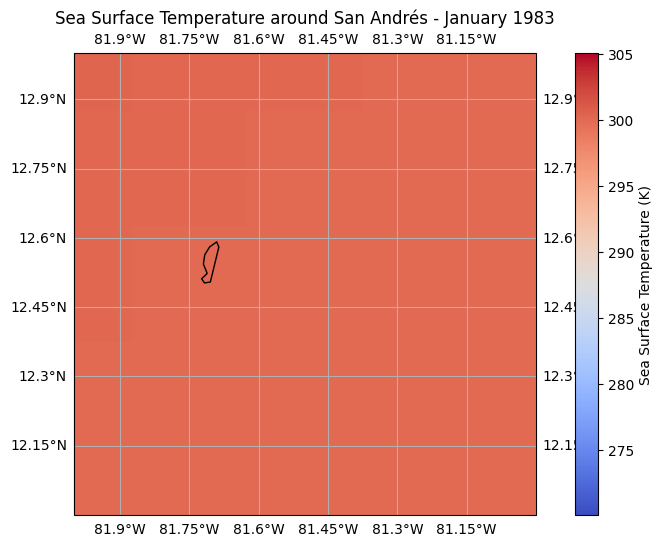

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Seleccionar la variable específica y un tiempo
sst = ds['sst']
sst_time = sst.sel(time='1983-01-16T16:00:00', method='nearest')

# Crear el gráfico centrado en San Andrés
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Configurar la extensión del mapa para enfocarse en San Andrés
ax.set_extent([-82, -81, 12, 13], crs=ccrs.PlateCarree())  # [lon_min, lon_max, lat_min, lat_max]

# Graficar los datos de temperatura superficial
sst_time.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'Sea Surface Temperature (K)'})

# Añadir características del mapa
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)
ax.set_title('Sea Surface Temperature around San Andrés - January 1983')

# Mostrar el mapa
plt.show()

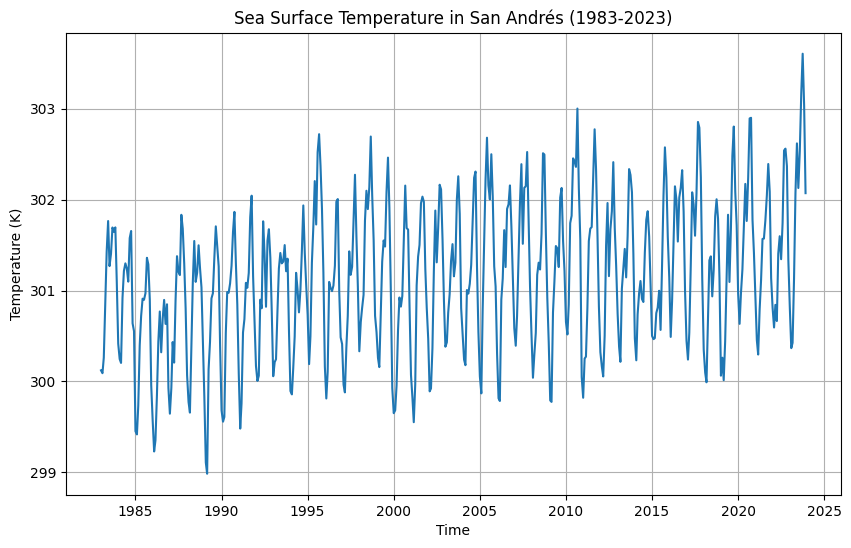

In [4]:
import matplotlib.pyplot as plt
#TEMPERATURASUPERFICIAL
# Cargar el archivo NetCDF
ds = xr.open_dataset('download.nc')  # Reemplaza 'download.nc' por el nombre de tu archivo

# Seleccionar la variable de temperatura superficial del mar
sst = ds['sst']

# Seleccionar los datos de la ubicación cercana a San Andrés (12.58°N, -81.70°W)
san_andres_data = sst.sel(latitude=12.58, longitude=-81.70, method='nearest')

# Graficar la serie temporal de la temperatura superficial del mar en San Andrés
plt.figure(figsize=(10, 6))
san_andres_data.plot()
plt.title('Sea Surface Temperature in San Andrés (1983-2023)')
plt.ylabel('Temperature (K)')
plt.xlabel('Time')
plt.grid(True)
plt.show()

<xarray.DataArray 'time' (time: 492)> Size: 4kB
array(['1983-01-01T16:00:00.000000000', '1983-02-01T16:00:00.000000000',
       '1983-03-01T16:00:00.000000000', ..., '2023-10-01T16:00:00.000000000',
       '2023-11-01T16:00:00.000000000', '2023-12-01T16:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 4kB 1983-01-01T16:00:00 ... 2023-12-01T16:...
Attributes:
    long_name:  time
